In [28]:
# Import the libraries
from sklearnex import patch_sklearn
patch_sklearn()

# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, accuracy_score

# import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split

# import encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, LabelBinarizer

# import scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# import models
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# importing feature selection algorithms
from sklearn.feature_selection import SelectKBest, chi2
print("All Libraries are imported and ready to use!")



All Libraries are imported and ready to use!


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
data = pd.read_excel('Python_Project_7_KNN.xlsx')

In [5]:
data1 = data.copy(deep=True)
data2 = data.copy(deep=True)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [9]:
data1.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [10]:
data1.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [11]:
data1.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


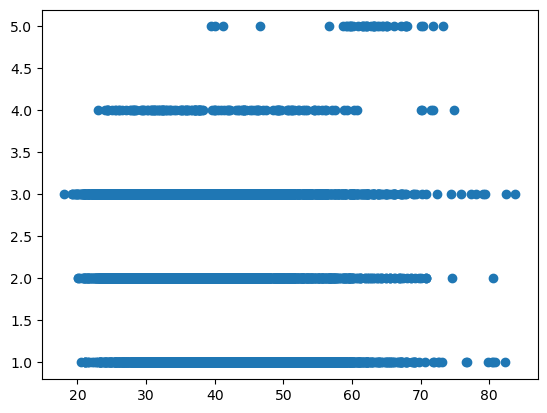

In [14]:
plt.scatter(data1['Age'],data1['Total Work Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22317cccf70>,
 'caps': [<matplotlib.lines.Line2D at 0x22317ccd4b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22317ccccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x22317ccd9f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22317ccdc90>],
 'means': []}

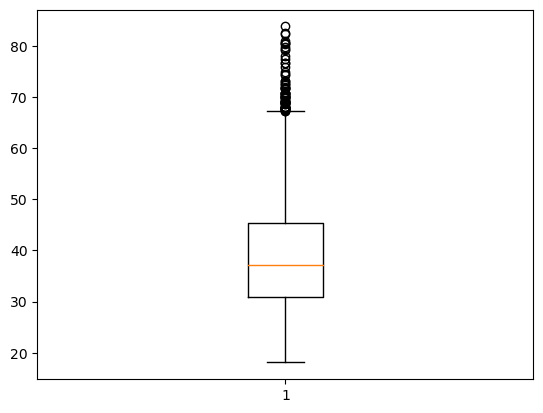

In [17]:
plt.boxplot(data1['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22317d38af0>,
 'caps': [<matplotlib.lines.Line2D at 0x22317d39030>,
 'boxes': [<matplotlib.lines.Line2D at 0x22317d387c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22317d39570>],
 'fliers': [<matplotlib.lines.Line2D at 0x22317d39810>],
 'means': []}

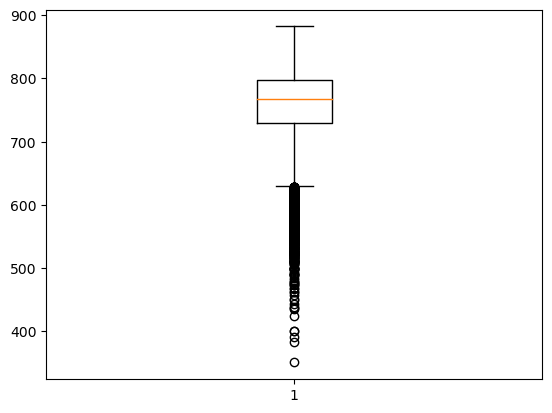

In [18]:
plt.boxplot(data1['Cibil score'])

In [20]:
x = data1.drop('Total bounces past12months',axis=1)
y = data1['Total bounces past12months']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
# testing score
knc.score(x_test,y_test)

0.6275708727070595

In [26]:
# training score
knc.score(x_train,y_train)

0.6778765981100612

In [27]:
y_pred = knc.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.6275708727070595

In [31]:
test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))

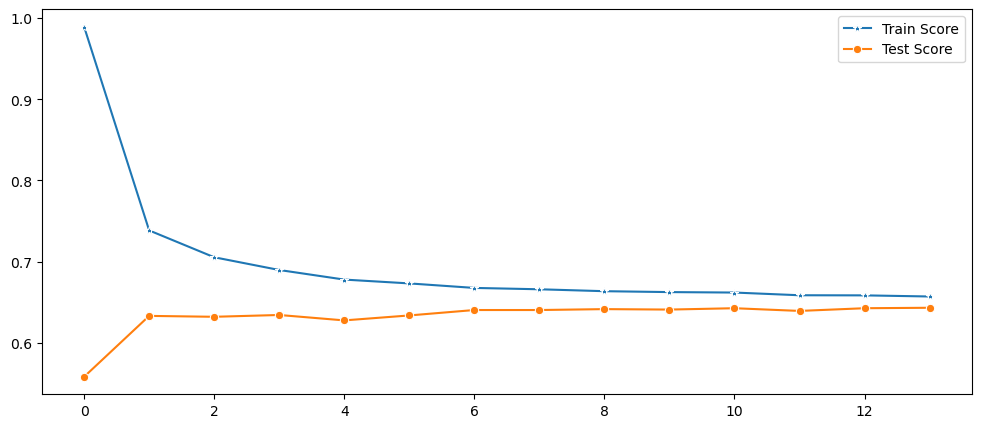

In [33]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')